## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
import pickle
from utils.helper import *
import utils.pipeline as up

In [2]:
df=open("output_images/calibration_wide/wide_dist_pickle.p",'rb')
dist_pickle = pickle.load(df)
mtx = dist_pickle["mtx"] 
dist = dist_pickle["dist"]

In [4]:
sx_thresh=(15, 255)
dir_thresh=(0, np.pi/32)
s_thresh=(180, 255)

image_names = os.listdir("test_images/")
Pip = up.Pipeline(mtx, dist, sx_thresh, dir_thresh, s_thresh)
for image_name in image_names:
    img = mpimg.imread('test_images/'+image_name)
    result = Pip.pipeline(img)
    write_name = 'output_images/test_images_output/'+image_name
    cv2.imwrite(write_name, cv2.cvtColor(result, cv2.COLOR_RGB2BGR))
    Pip.detected = False

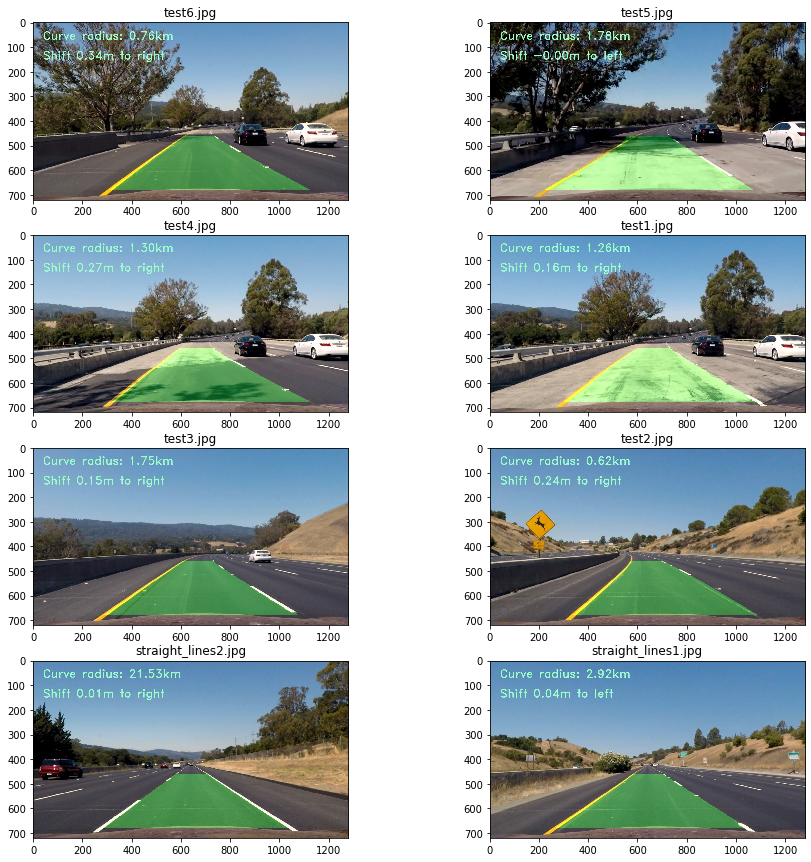

In [5]:
image_names = os.listdir("output_images/test_images_output/")
plt.figure(figsize=(15,15))
i = 0
for image_name in image_names:
    img = cv2.imread('output_images/test_images_output/'+image_name)
    plt.subplot(4,2,i+1)
    plt.title(image_name)
    i += 1
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()